In [1]:
sc

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1589660637587_0004,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-3>

In [2]:
%%configure -f
{ "conf":{
"spark.pyspark.python": "python3",
"spark.pyspark.virtualenv.enabled": "true",
"spark.pyspark.virtualenv.type":"native",
"spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
}}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1589660637587_0005,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1589660637587_0005,pyspark,idle,Link,Link,✔


In [3]:
sc.install_pypi_package("pandas")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

In [4]:
sc.install_pypi_package("matplotlib")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

In [5]:
from pyspark.sql import SparkSession

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
#import SparkSession
spark=SparkSession.builder.appName('data_processing').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
#create spark session object
df=spark.read.csv('s3://covid19proyecto3/datasets/colombia/Casos_positivos_de_COVID-19_en_Colombia.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [62]:
# Load csv Dataset 
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['ID de caso', 'Fecha de notificación', 'Codigo DIVIPOLA', 'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad', 'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'FIS', 'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado', 'fecha reporte web', 'Fecha Recuperacion', 'Fecha Fallecimiento', 'month_diagnosis', 'month_recovery', 'month_death']

In [9]:
#Estado del paciente
df.groupBy('Estado').count().show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+-----+
|      Estado|count|
+------------+-----+
|        null|   15|
|   Fallecido|  545|
|    Moderado|  806|
|Asintomático| 1717|
|        Leve|10998|
|       Grave|  135|
+------------+-----+

In [10]:
#Informacion de los fallecidos
df.filter(df['Estado']=='Fallecido').select('Edad','Sexo','Ciudad de ubicación').show(500)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+----+--------------------+
|Edad|Sexo| Ciudad de ubicación|
+----+----+--------------------+
|  65|   M|         Bogotá D.C.|
|  53|   F|         Bogotá D.C.|
|  88|   M|         Santa Marta|
|  70|   F|                Cali|
|  58|   M| Cartagena de Indias|
|  59|   F|         Bogotá D.C.|
|  76|   M|         Bogotá D.C.|
|  61|   M|         Bogotá D.C.|
|  40|   M|                Cali|
|  83|   F|               Neiva|
|  62|   M|             Ipiales|
|  61|   M|             Pereira|
|  73|   M|         Bogotá D.C.|
|  80|   F|                Cali|
|  84|   M|         Bogotá D.C.|
|  72|   M|         Bogotá D.C.|
|  71|   M|         Bogotá D.C.|
|  25|   M|        Barranquilla|
|  50|   M|             Soledad|
|  51|   M|                Cali|
|  49|   M|         Bogotá D.C.|
|  48|   F|         Bogotá D.C.|
|  57|   F|         Bogotá D.C.|
|  67|   F|         Villapinzón|
|  36|   M|                Cali|
|  33|   F| Cartagena de Indias|
|  80|   M|       San Francisco|
|  65|   M

In [11]:
#Fallecidos por ciudad
df.filter(df['Estado']=='Fallecido').groupBy('Ciudad de ubicación').count().orderBy('count',ascending=False).show(500)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.|  163|
|                Cali|   70|
| Cartagena de Indias|   61|
|             Leticia|   33|
|        Barranquilla|   26|
|         Santa Marta|   17|
|             Soledad|   11|
|San Andrés de Tumaco|   11|
|              Cúcuta|    8|
|        Buenaventura|    7|
|       Villavicencio|    7|
|             Pereira|    7|
|          Valledupar|    6|
|               Neiva|    5|
|             Malambo|    5|
|               Pasto|    4|
|              Soacha|    4|
|         Puebloviejo|    4|
|             Palmira|    4|
|              Ibagué|    3|
|               Chocó|    3|
|            Mosquera|    3|
|            Medellín|    3|
|               Tuluá|    3|
|             Ipiales|    3|
|              Melgar|    2|
|          San Martín|    2|
|               Tenjo|    2|
|           Zipaquirá|    2|
|           Manizales|    2|
|           La Dorada|    2|
|       Zona B

In [12]:
#printSchema
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- ID de caso: integer (nullable = true)
 |-- Fecha de notificación: timestamp (nullable = true)
 |-- Codigo DIVIPOLA: integer (nullable = true)
 |-- Ciudad de ubicación: string (nullable = true)
 |-- Departamento o Distrito : string (nullable = true)
 |-- atención: string (nullable = true)
 |-- Edad: integer (nullable = true)
 |-- Sexo: string (nullable = true)
 |-- Tipo: string (nullable = true)
 |-- Estado: string (nullable = true)
 |-- País de procedencia: string (nullable = true)
 |-- FIS: string (nullable = true)
 |-- Fecha de muerte: string (nullable = true)
 |-- Fecha diagnostico: timestamp (nullable = true)
 |-- Fecha recuperado: string (nullable = true)
 |-- fecha reporte web: timestamp (nullable = true)

In [13]:
#Recuperados por ciudad
df.filter(df['atención']=='Recuperado').groupBy('Ciudad de ubicación').count().orderBy('count',ascending=False).show(500)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.| 1352|
|                Cali|  405|
|            Medellín|  190|
| Cartagena de Indias|  153|
|             Pereira|  101|
|         Santa Marta|   72|
|        Barranquilla|   68|
|              Soacha|   50|
|              Cúcuta|   49|
|               Neiva|   48|
|        Dosquebradas|   44|
|              Ibagué|   43|
|          Valledupar|   42|
|             Armenia|   41|
|       Villavicencio|   40|
|               Bello|   36|
|             Ipiales|   32|
|             Palmira|   29|
|             Ciénaga|   28|
|             Leticia|   28|
|            Envigado|   21|
|           La Dorada|   19|
|             Soledad|   19|
|                Chía|   19|
|             Popayán|   16|
|               Yumbo|   15|
|           Manizales|   15|
|              Cajicá|   15|
|               Pasto|   13|
|         Bucaramanga|   13|
|               Tuluá|   13|
|             

In [14]:
df = df.withColumn("Fecha Recuperacion",df['Fecha recuperado'].astype('Timestamp'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
df = df.withColumn("Fecha Fallecimiento",df['Fecha de muerte'].astype('Timestamp'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
df.select('Fecha Recuperado').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|    Fecha Recuperado|
+--------------------+
|2020-03-13T00:00:...|
|2020-03-19T00:00:...|
|2020-03-15T00:00:...|
|2020-03-26T00:00:...|
|2020-03-23T00:00:...|
|2020-03-26T00:00:...|
|2020-03-17T00:00:...|
|2020-03-21T00:00:...|
|2020-03-23T00:00:...|
|2020-03-21T00:00:...|
+--------------------+
only showing top 10 rows

In [17]:
#Dias en contagio de los recuperados
df.filter(df['atención']=='Recuperado').select('FIS','Fecha diagnostico','Fecha recuperacion').show(500)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------------+-------------------+
|                 FIS|  Fecha diagnostico| Fecha recuperacion|
+--------------------+-------------------+-------------------+
|2020-02-27T00:00:...|2020-03-06 00:00:00|2020-03-13 00:00:00|
|2020-03-04T00:00:...|2020-03-09 00:00:00|2020-03-19 00:00:00|
|2020-02-29T00:00:...|2020-03-09 00:00:00|2020-03-15 00:00:00|
|2020-03-06T00:00:...|2020-03-11 00:00:00|2020-03-26 00:00:00|
|2020-03-08T00:00:...|2020-03-11 00:00:00|2020-03-23 00:00:00|
|2020-03-06T00:00:...|2020-03-11 00:00:00|2020-03-26 00:00:00|
|2020-03-02T00:00:...|2020-03-11 00:00:00|2020-03-17 00:00:00|
|2020-03-06T00:00:...|2020-03-11 00:00:00|2020-03-21 00:00:00|
|2020-03-07T00:00:...|2020-03-11 00:00:00|2020-03-23 00:00:00|
|2020-03-06T00:00:...|2020-03-12 00:00:00|2020-03-21 00:00:00|
|2020-03-06T00:00:...|2020-03-12 00:00:00|2020-03-31 00:00:00|
|2020-03-06T00:00:...|2020-03-12 00:00:00|2020-04-09 00:00:00|
|2020-03-06T00:00:...|2020-03-12 00:00:00|2020-03-30 00

In [18]:
#Cantidad de personas segun el estado y la edad 
df.groupBy('Estado','Edad').count().orderBy('count', ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----+-----+
|Estado|Edad|count|
+------+----+-----+
|  Leve|  29|  312|
|  Leve|  27|  303|
|  Leve|  30|  295|
|  Leve|  28|  289|
|  Leve|  26|  288|
|  Leve|  31|  273|
|  Leve|  25|  270|
|  Leve|  32|  269|
|  Leve|  34|  259|
|  Leve|  24|  256|
|  Leve|  39|  253|
|  Leve|  35|  248|
|  Leve|  33|  247|
|  Leve|  38|  245|
|  Leve|  37|  239|
|  Leve|  23|  229|
|  Leve|  36|  226|
|  Leve|  40|  216|
|  Leve|  22|  210|
|  Leve|  41|  208|
+------+----+-----+
only showing top 20 rows

In [19]:
#Informacion de los asintomaticos
df.filter(df['FIS']=='Asintomático').select('Edad','Sexo','Ciudad de ubicación').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+----+-------------------+
|Edad|Sexo|Ciudad de ubicación|
+----+----+-------------------+
|  30|   F|Cartagena de Indias|
|  30|   F|Cartagena de Indias|
|  79|   M|              Neiva|
|  31|   M|        Bogotá D.C.|
|  42|   F|               Cali|
|  28|   M|        La Estrella|
|  54|   M|           Envigado|
|  36|   M|         San Andrés|
|  38|   F|              Yopal|
|  38|   F|            Armenia|
|  15|   F|            Viterbo|
|  22|   F|               Cali|
|  33|   M|            Villeta|
|  44|   F|            Villeta|
|  33|   M|               Cali|
|  28|   F|               Cali|
|  21|   M|        Bogotá D.C.|
|  39|   M|        Bogotá D.C.|
|  25|   M|        Bogotá D.C.|
|  43|   F|        Bogotá D.C.|
+----+----+-------------------+
only showing top 20 rows

In [20]:
#Personas bajo cuidados intensivos
df.filter(df['atención']=='Hospital UCI').select('Edad','Ciudad de ubicación').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------------------+
|Edad|Ciudad de ubicación|
+----+-------------------+
|  74|               Cali|
|  49|Cartagena de Indias|
|  64|        Bogotá D.C.|
|  54|               Cali|
|  64|               Cali|
|  69|        Bogotá D.C.|
|  57|               Cali|
|  54|             Cúcuta|
|  71|        Bogotá D.C.|
|  66|        Bogotá D.C.|
|  73|        Bogotá D.C.|
|  59|        Bogotá D.C.|
|  73|Cartagena de Indias|
|  50|        Bogotá D.C.|
|  64|               Cali|
|  36|               Cali|
|  62|               Cali|
|  71|       Buenaventura|
|  60|               Cali|
|  78|        Bogotá D.C.|
+----+-------------------+
only showing top 20 rows

In [21]:
#promedio de edad de los fallecidos por sexo
df.filter(df['Estado']=='Fallecido').groupBy('Sexo').mean('Edad').show(5,False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----------------+
|Sexo|avg(Edad)        |
+----+-----------------+
|F   |69.02358490566037|
|M   |65.86486486486487|
+----+-----------------+

In [22]:
#Cantidad de recuperados por sexo
df.filter(df['atención']=='Recuperado').groupBy('Sexo').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+
|Sexo|count|
+----+-----+
|   F| 1761|
|   M| 1699|
+----+-----+

In [23]:
#Origen del contagio
df.groupBy('tipo').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----+
|       tipo|count|
+-----------+-----+
|Relacionado| 4137|
|  Importado|  840|
| En Estudio| 9239|
+-----------+-----+

In [24]:
#Casos importados
df.filter(df['tipo']=='Importado').groupBy('País de procedencia').count().orderBy('count', ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
| País de procedencia|count|
+--------------------+-----+
|              España|  258|
|Estados Unidos de...|  215|
|              México|   49|
|             Ecuador|   48|
|              Panamá|   34|
|              Brasil|   31|
|             Turquía|   28|
|             Francia|   16|
|             Jamaica|   16|
|         Reino Unido|   14|
|         Puerto Rico|   13|
|              Egipto|   11|
|                Perú|   11|
|            Alemania|   10|
|              Italia|    9|
|República Dominicana|    9|
|            Colombia|    8|
|San Martín (Francia)|    7|
|              Israel|    6|
|           Argentina|    4|
+--------------------+-----+
only showing top 20 rows

In [25]:
#Libreria matplot y pandas
import matplotlib.pyplot as plt
import pandas as pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

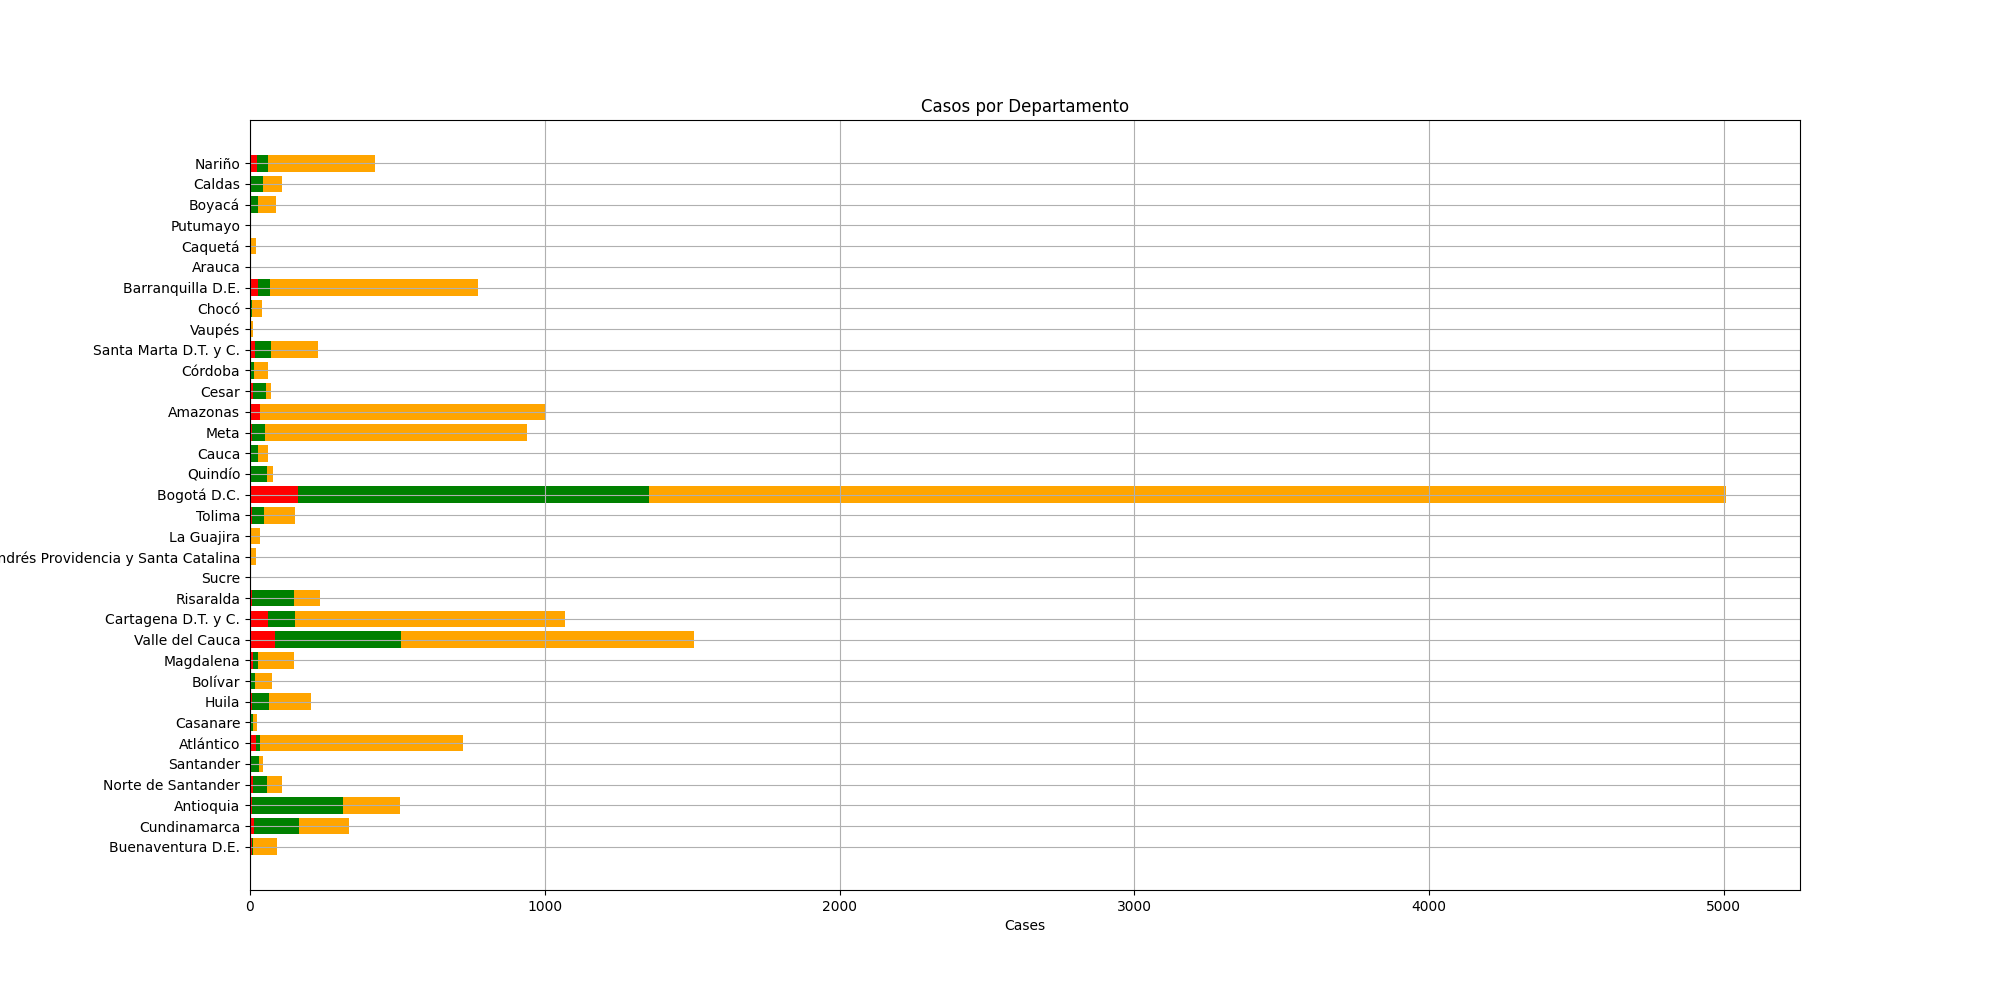

In [68]:
#Grafica contagiados,recuperados y muertos por Departamento
deps = df.groupBy('Departamento o Distrito ').count().toPandas()['Departamento o Distrito '].values.tolist()
casos =df.groupBy('Departamento o Distrito ').count().toPandas()['count'].values.tolist()

depsd= df.filter(df['atención']=='Fallecido').groupBy('Departamento o Distrito ').count().toPandas()['Departamento o Distrito '].values.tolist()
casosd =df.filter(df['atención']=='Fallecido').groupBy('Departamento o Distrito ').count().toPandas()['count'].values.tolist()

depsr = df.filter(df['atención']=='Recuperado').groupBy('Departamento o Distrito ').count().toPandas()['Departamento o Distrito '].values.tolist()
casosr =df.filter(df['atención']=='Recuperado').groupBy('Departamento o Distrito ').count().toPandas()['count'].values.tolist()

fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(deps, casos, color='Orange')
ax.barh(depsr, casosr, color='Green')
ax.barh(depsd, casosd, color='Red')
ax.set(xlabel='Cases', ylabel='Country',
       title='Casos por Departamento')
ax.grid()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

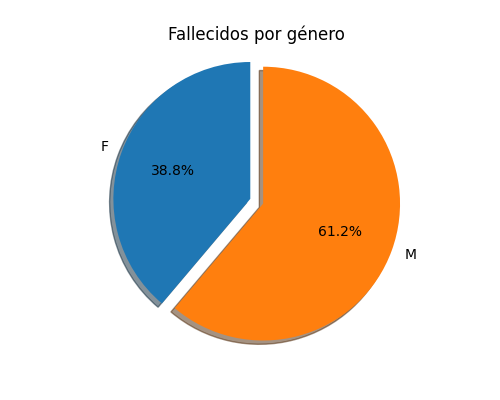

In [59]:
labelsd = df.filter(df['atención']=='Fallecido').groupBy('Sexo').count().toPandas()['Sexo'].values.tolist()
sizesd = df.filter(df['atención']=='Fallecido').groupBy('Sexo').count().toPandas()['count'].values.tolist()
fig1, ax2 = plt.subplots(figsize=(5, 4))
ax2.pie(sizesd, explode=explode, labels=labelsd, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('Fallecidos por género')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

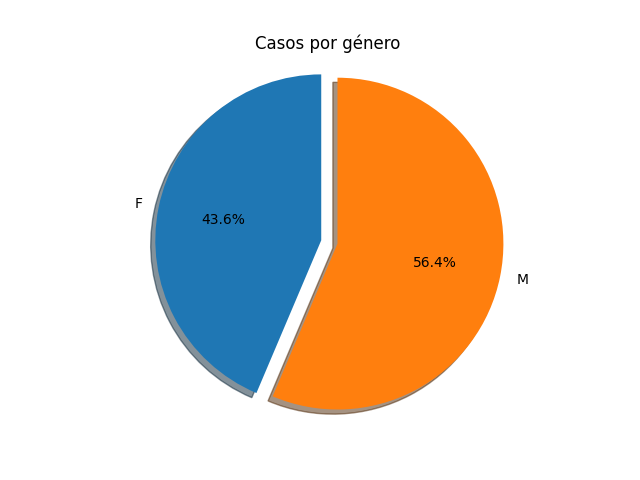

In [52]:
#Porcentaje de casos por sexo
labels = df.groupBy('Sexo').count().toPandas()['Sexo'].values.tolist()
sizes = df.groupBy('Sexo').count().toPandas()['count'].values.tolist()
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Casos por género')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

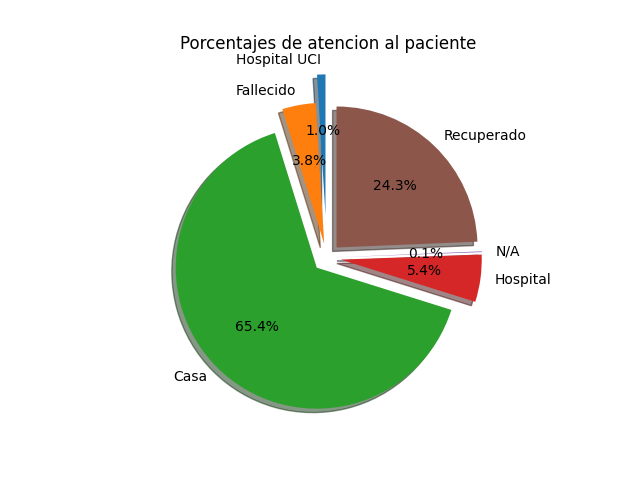

In [28]:
#Porcentajes de atencion al paciente
labels = df.groupBy('atención').count().toPandas()['atención'].values.tolist()
sizes = df.groupBy('atención').count().toPandas()['count'].values.tolist()
explode = (0.3, 0.1,0.1,0.1,0.1,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Porcentajes de atencion al paciente')
%matplot plt

In [29]:
from pyspark.sql.functions import udf

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
df.select(df['Sexo']=='M').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

14216

In [31]:
df.groupBy('Fecha diagnostico').count().orderBy('Fecha diagnostico',ascending=True).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|  Fecha diagnostico|count|
+-------------------+-----+
|2020-03-06 00:00:00|    1|
|2020-03-09 00:00:00|    2|
|2020-03-11 00:00:00|    6|
|2020-03-12 00:00:00|    5|
|2020-03-13 00:00:00|    5|
|2020-03-14 00:00:00|   18|
|2020-03-15 00:00:00|   16|
|2020-03-16 00:00:00|   14|
|2020-03-17 00:00:00|   25|
|2020-03-18 00:00:00|   12|
|2020-03-19 00:00:00|   26|
|2020-03-20 00:00:00|   48|
|2020-03-21 00:00:00|   34|
|2020-03-22 00:00:00|   29|
|2020-03-23 00:00:00|   73|
|2020-03-24 00:00:00|  105|
|2020-03-25 00:00:00|   61|
|2020-03-26 00:00:00|   10|
|2020-03-27 00:00:00|   49|
|2020-03-28 00:00:00|   69|
+-------------------+-----+
only showing top 20 rows

In [32]:
#Funcion para extraer el mes de diagnostico 

from pyspark.sql.types import StringType,DoubleType,IntegerType
def cases_month(date):
   date =str(date)
   date1,hour = date.split(" ")
   y,m,d=date1.split('-')
   return m
    

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
#create udf using python function
month_udf=udf(cases_month,StringType())
#apply udf on dataframe
df= df.withColumn('month_diagnosis',month_udf(df['Fecha diagnostico']))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

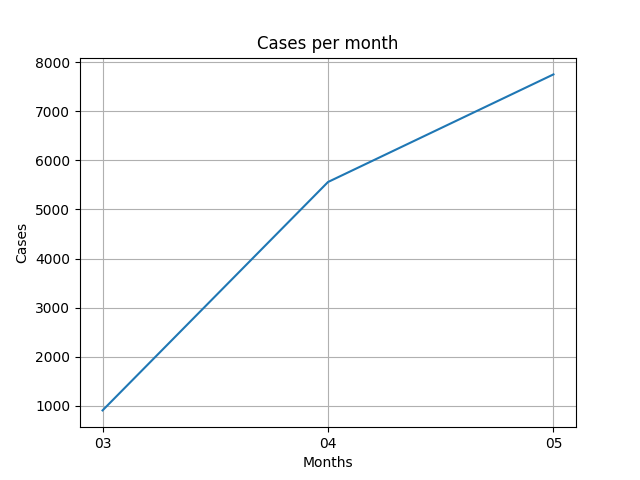

In [34]:
#Casos por mes
meses=  df.groupBy('month_diagnosis').count().orderBy('month_diagnosis',ascending=True).toPandas()['month_diagnosis'].values.tolist()
cantidad=df.groupBy('month_diagnosis').count().orderBy('month_diagnosis',ascending=True).toPandas()['count'].values.tolist()
fig, ax = plt.subplots()
ax.plot(meses, cantidad)
ax.set(xlabel='Months', ylabel='Cases',
       title='Cases per month')
ax.grid()
%matplot plt

In [35]:
#Funcion para extraer el mes de recuperacion 
from pyspark.sql.types import StringType,DoubleType,IntegerType
def cases_month_recovery(date):
   date =str(date)
   if len(date) > 6:
       date1,hour = date.split(" ")
       y,m,d=date1.split('-')
       return m
   else:
       return 'no recuperado'


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
#create udf using python function
monthr_udf=udf(cases_month_recovery,StringType())
#apply udf on dataframe
df=df.withColumn('month_recovery',monthr_udf(df['Fecha Recuperacion']))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
#Funcion para extraer el mes de fallecimiento 
from pyspark.sql.types import StringType,DoubleType,IntegerType
def cases_month_death(date):
   date =str(date)
   if len(date) > 6:
       date1,hour = date.split(" ")
       y,m,d=date1.split('-')
       return m
   else:
       return 'vivo'

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
#create udf using python function
monthd_udf=udf(cases_month_death,StringType())
#apply udf on dataframe
df=df.withColumn('month_death',monthd_udf(df['Fecha Fallecimiento']))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

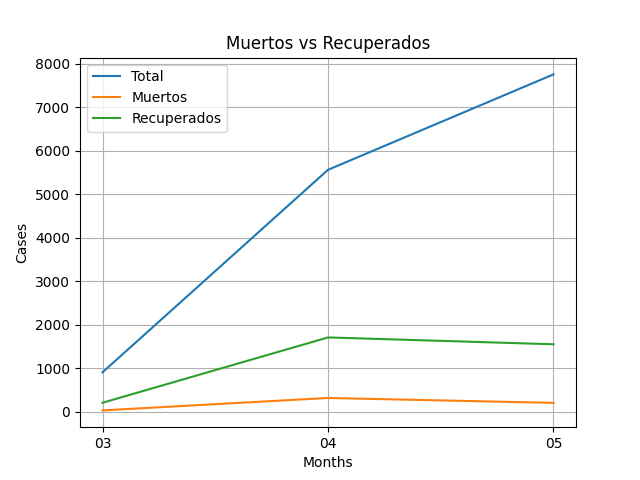

In [39]:
#Muertos vs recuperados
mesesd= df.filter(df['atención']=='Fallecido').groupBy('month_death').count().orderBy('month_death',ascending=True).toPandas()['month_death'].values.tolist()
cantidadd=df.filter(df['atención']=='Fallecido').groupBy('month_death').count().orderBy('month_death',ascending=True).toPandas()['count'].values.tolist()

mesesr= df.filter(df['atención']=='Recuperado').groupBy('month_recovery').count().orderBy('month_recovery',ascending=True).toPandas()['month_recovery'].values.tolist()
cantidadr=df.filter(df['atención']=='Recuperado').groupBy('month_recovery').count().orderBy('month_recovery',ascending=True).toPandas()['count'].values.tolist()
fig, ax1 = plt.subplots()
ax1.plot(meses, cantidad, label='Total')
ax1.plot(mesesd, cantidadd, label='Muertos')
ax1.plot(mesesr, cantidadr, label='Recuperados')
ax1.set(xlabel='Months', ylabel='Cases',
       title='Muertos vs Recuperados')
ax1.grid()
ax1.legend()

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

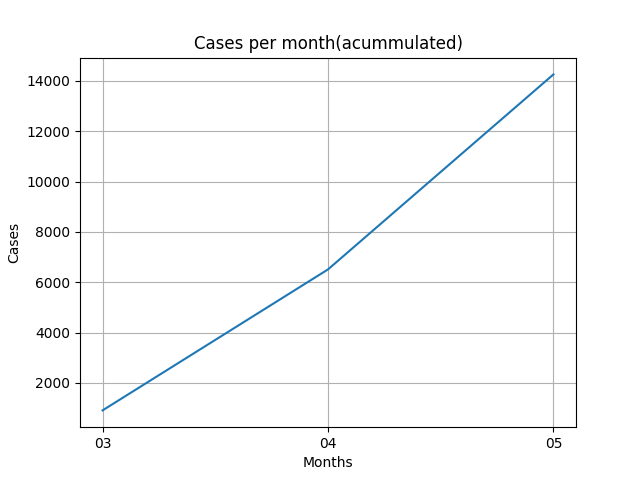

In [40]:
#Casos por mes incremental
fechas=  df.groupBy('month_diagnosis').max('ID de caso').orderBy('month_diagnosis', ascending=True).toPandas()['month_diagnosis'].values.tolist()
casos=df.groupBy('month_diagnosis').max('ID de caso').orderBy('month_diagnosis', ascending=True).toPandas()['max(ID de caso)'].values.tolist()
fig, ax = plt.subplots()
ax.plot(fechas, casos)
ax.set(xlabel='Months', ylabel='Cases',
       title='Cases per month(acummulated)')
ax.grid()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

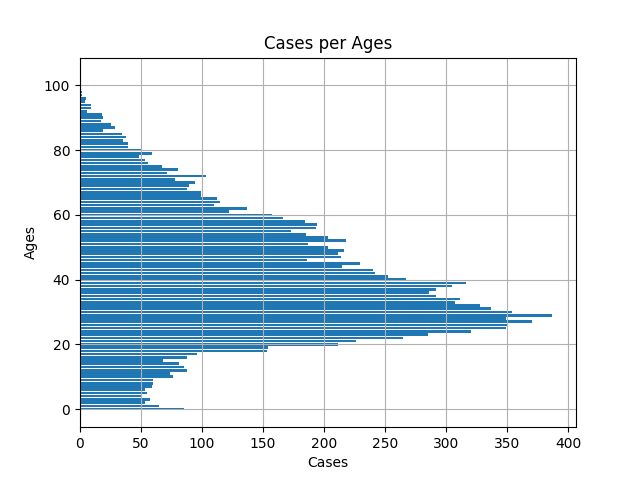

In [41]:
#Casos por Edad
edades=  df.groupBy('Edad').count().toPandas()['Edad'].values.tolist()
casos=df.groupBy('Edad').count().toPandas()['count'].values.tolist()
fig, ax = plt.subplots()
ax.barh(edades, casos)
ax.set(xlabel='Cases', ylabel='Ages',
       title='Cases per Ages')
ax.grid()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

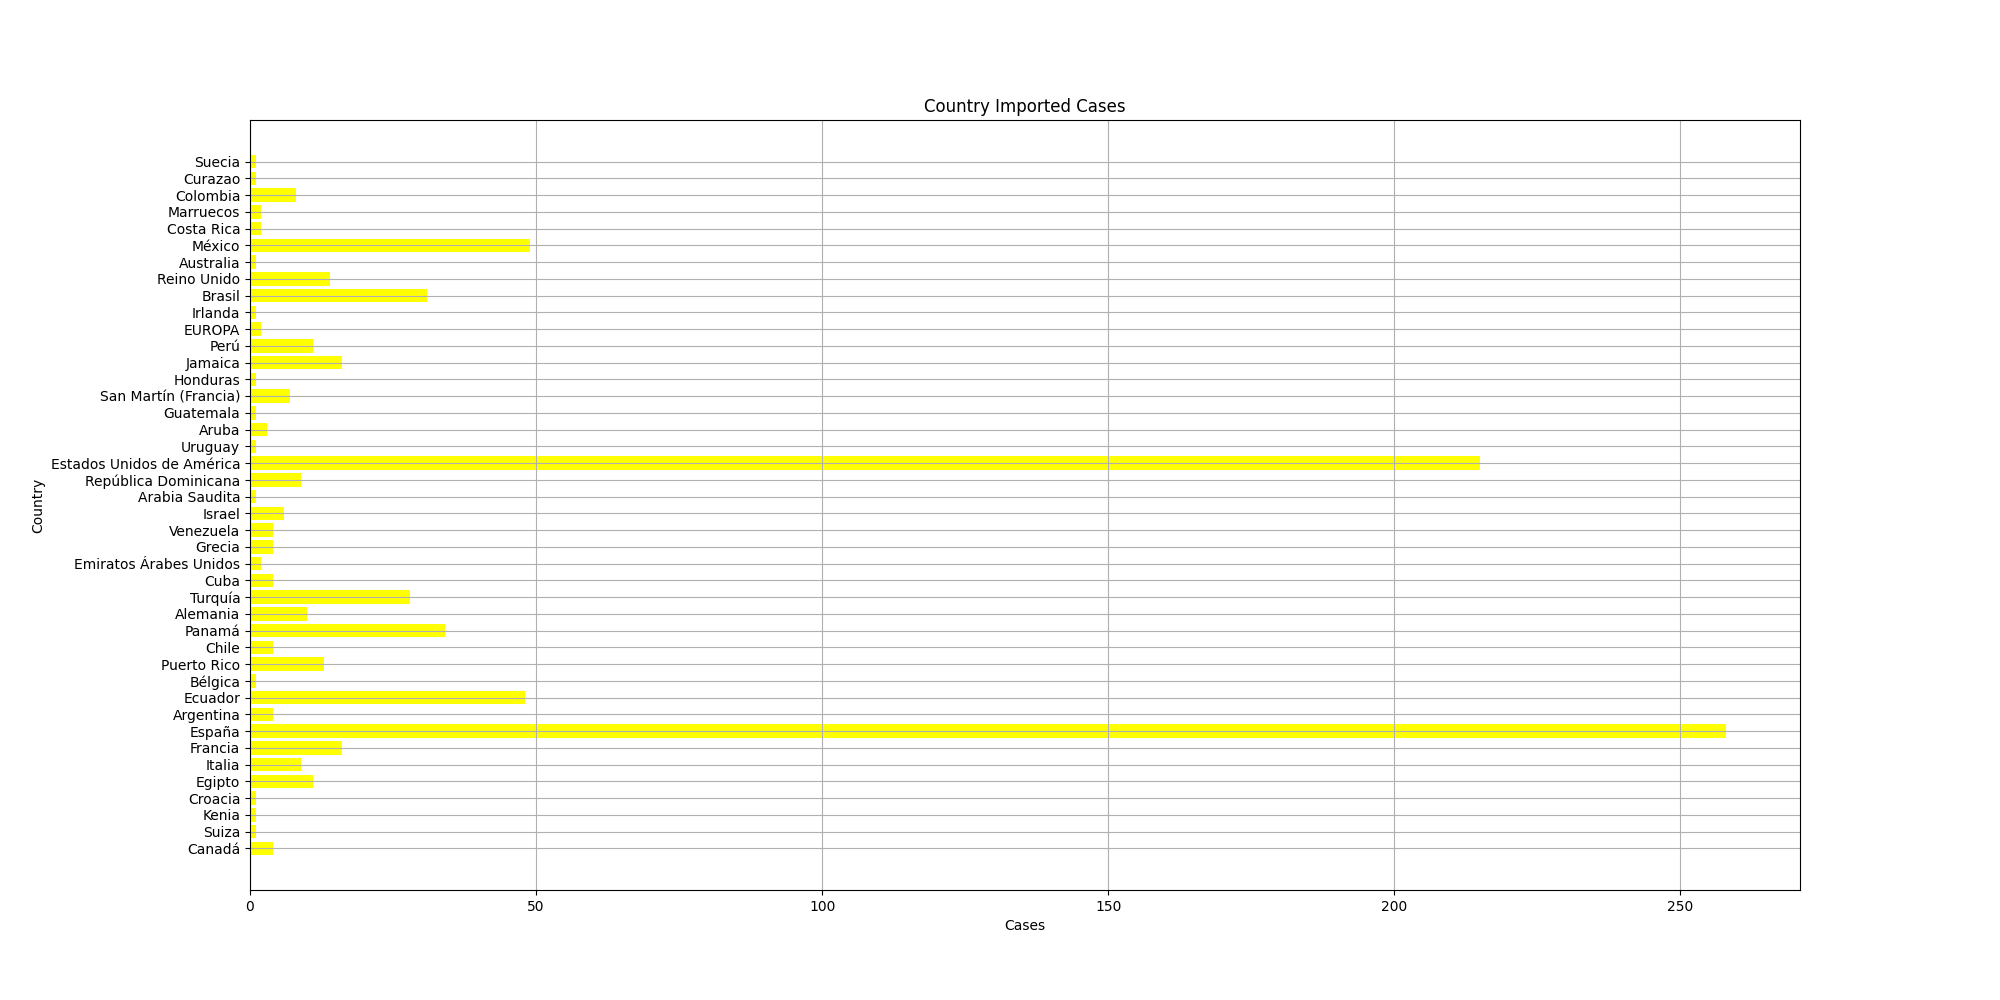

In [42]:
#Origen importado del caso

paises = df.filter(df['tipo']=='Importado').groupBy('País de procedencia').count().toPandas()['País de procedencia'].values.tolist()
casos = df.filter(df['tipo']=='Importado').groupBy('País de procedencia').count().toPandas()['count'].values.tolist()
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(paises, casos, color='yellow')
ax.set(xlabel='Cases', ylabel='Country',
       title='Country Imported Cases')
ax.grid()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

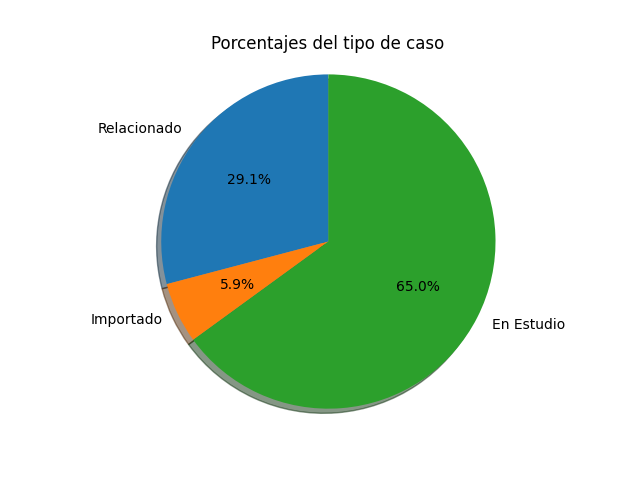

In [43]:
#Origenes del caso
labels= df.groupBy('tipo').count().toPandas()['tipo'].values.tolist()
sizes=df.groupBy('tipo').count().toPandas()['count'].values.tolist()
#explode = (0.3, 0.1,0.1,0.1,0.1,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Porcentajes del tipo de caso')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

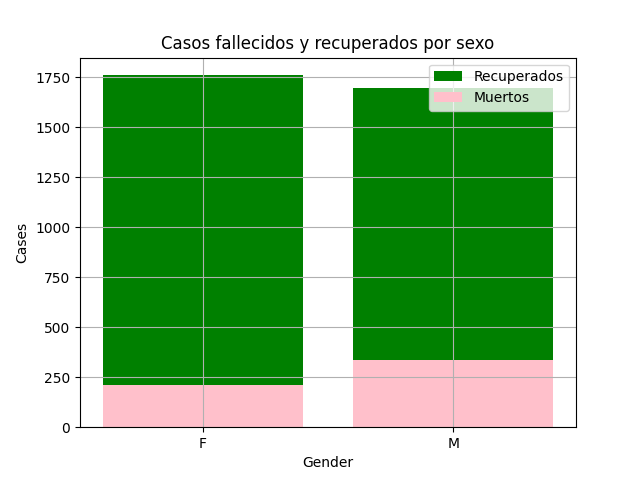

In [69]:
#Casos fallecidos y recuperaodos por sexo

genderv = df.filter(df['atención']=='Recuperado').groupBy('Sexo').count().toPandas()['Sexo'].values.tolist()
casesv = df.filter(df['atención']=='Recuperado').groupBy('Sexo').count().toPandas()['count'].values.tolist()

genderm = df.filter(df['atención']=='Fallecido').groupBy('Sexo').count().toPandas()['Sexo'].values.tolist()
casesm = df.filter(df['atención']=='Fallecido').groupBy('Sexo').count().toPandas()['count'].values.tolist()

fig, ax = plt.subplots()
ax.bar(genderv, casesv, color='Green', label="Recuperados")
ax.bar(genderm, casesm, color='Pink', label= "Muertos")
ax.set(xlabel='Gender', ylabel='Cases',
       title='Casos fallecidos y recuperados por sexo')
ax.grid()
ax.legend()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

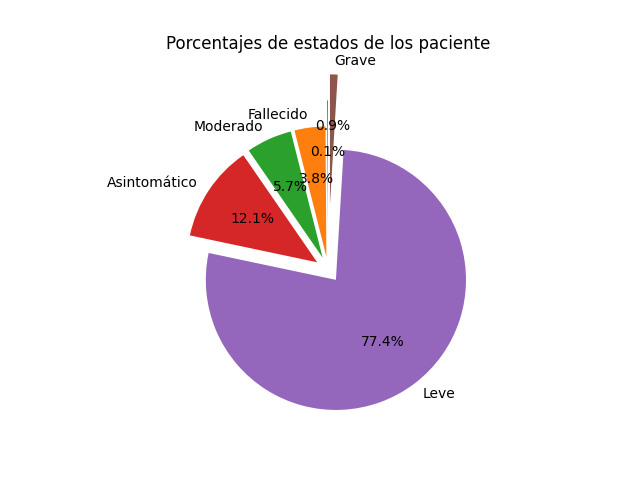

In [45]:
#Esrtado de los pacientes
labels= df.groupBy('Estado').count().toPandas()['Estado'].values.tolist()
sizes=df.groupBy('Estado').count().toPandas()['count'].values.tolist()
explode = (0.3, 0.1,0.1,0.1,0.1,0.5)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
ax1.set_title('Porcentajes de estados de los paciente')
%matplot plt